<a href="https://colab.research.google.com/github/abhisheksaha28/Final_year_project/blob/main/Disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **load dataset & tools**

In [1]:
import  pandas as pd

In [16]:
dataset = pd.read_csv('Dataset/Training.csv')
#dataset = pd.read_csv('Dataset/testing.csv')

In [17]:
dataset


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


In [18]:
dataset.shape

(4920, 133)

# **train test split**

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [20]:
X = dataset.drop('prognosis', axis=1)
y = dataset['prognosis']

# ecoding prognonsis
le = LabelEncoder()
le.fit(y)
Y = le.transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=20)

# **Training top models** & getting the performance matrices

In [23]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
import numpy as np


# Create a dictionary to store models
models = {
    'SVC': SVC(kernel='linear', probability=True),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'KNeighbors': KNeighborsClassifier(n_neighbors=5),
    'MultinomialNB': MultinomialNB()
}

# Loop through the models, train, test, and print results
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Test the model
    predictions = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    print(f"{model_name} Accuracy: {accuracy}")

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, predictions)
    print(f"{model_name} Confusion Matrix:")
    print(np.array2string(cm, separator=', '))

     # Calculate F1 score
    f1 = f1_score(y_test, predictions, average='weighted' )
    print(f"{model_name} F1 Score: {f1}")

SVC Accuracy: 1.0
SVC Confusion Matrix:
[[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 28, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 34,  0,  0],
 [ 0,  0,  0, ...,  0, 41,  0],
 [ 0,  0,  0, ...,  0,  0, 31]]
SVC F1 Score: 1.0
RandomForest Accuracy: 1.0
RandomForest Confusion Matrix:
[[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 28, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 34,  0,  0],
 [ 0,  0,  0, ...,  0, 41,  0],
 [ 0,  0,  0, ...,  0,  0, 31]]
RandomForest F1 Score: 1.0
GradientBoosting Accuracy: 1.0
GradientBoosting Confusion Matrix:
[[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 28, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 34,  0,  0],
 [ 0,  0,  0, ...,  0, 41,  0],
 [ 0,  0,  0, ...,  0,  0, 31]]
GradientBoosting F1 Score: 1.0
KNeighbors Accuracy: 1.0
KNeighbors Confusion Matrix:
[[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 28, ...,  0,  0,  0],
 ...,
 [ 0,  0, 

# **Plotting ROC and PR Curves**

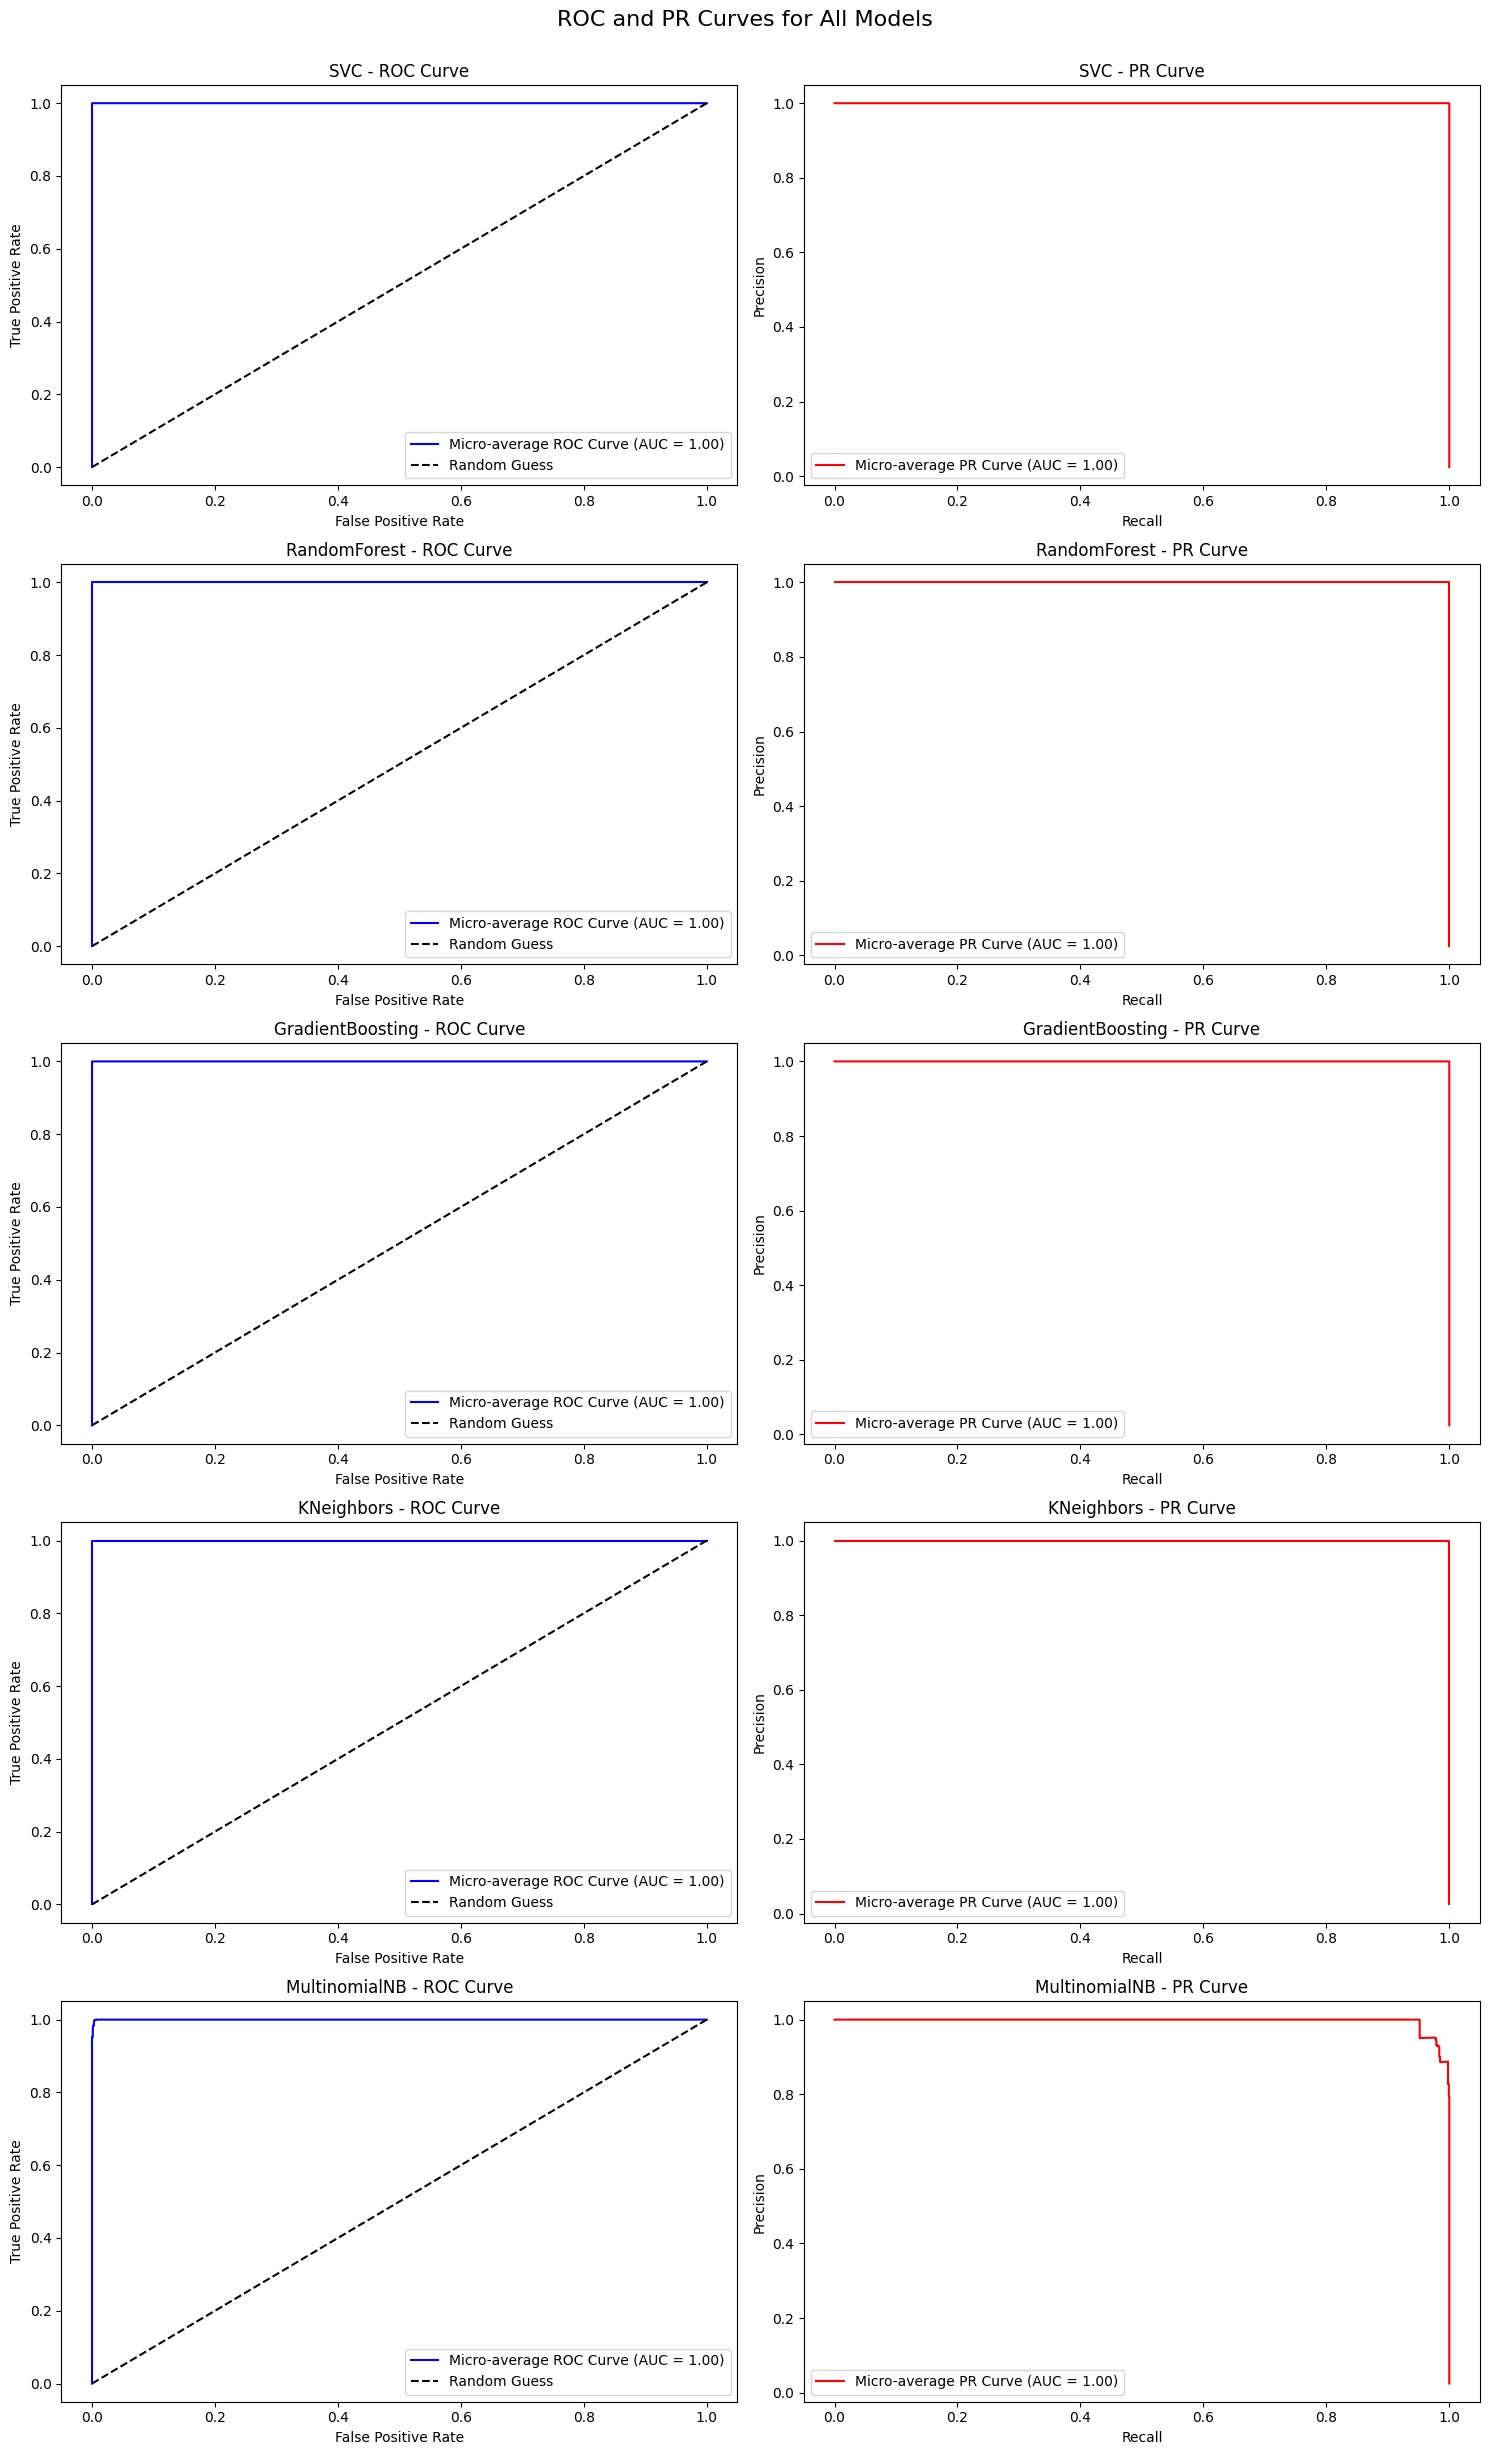

In [30]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc, average_precision_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Binarize the labels for multi-class ROC curve
n_classes = len(np.unique(y_test))  # Get the number of unique classes
y_test_binarized = label_binarize(y_test, classes=np.arange(n_classes))

# Create a dictionary to store results for each model
model_results = {}

# Loop through the models, train, test, and store results
for model_name, model in models.items():
    # Wrap the classifier with OneVsRestClassifier
    classifier = OneVsRestClassifier(model)
    classifier.fit(X_train, y_train)
    y_score = classifier.predict_proba(X_test)  # Get predicted probabilities

    # Calculate ROC and PR curve data
    fpr, tpr, roc_auc = {}, {}, {}
    precision, recall, average_precision = {}, {}, {}
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i], y_score[:, i])
        average_precision[i] = average_precision_score(y_test_binarized[:, i], y_score[:, i])

    # Calculate micro-average ROC and PR curve data
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_binarized.ravel(), y_score.ravel())
    average_precision["micro"] = average_precision_score(y_test_binarized, y_score, average="micro")

    # Store results for the current model
    model_results[model_name] = {
        'fpr': fpr,
        'tpr': tpr,
        'roc_auc': roc_auc,
        'precision': precision,
        'recall': recall,
        'average_precision': average_precision
    }

# Plot ROC and PR curves for all models
fig, axes = plt.subplots(len(models), 2, figsize=(15, len(models) * 5))
fig.suptitle('ROC and PR Curves for All Models', fontsize=16)

for i, (model_name, results) in enumerate(model_results.items()):
    # ROC curve
    ax = axes[i, 0]
    ax.plot(results['fpr']["micro"], results['tpr']["micro"], color='blue', label=f'Micro-average ROC Curve (AUC = {results["roc_auc"]["micro"]:.2f})')
    ax.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'{model_name} - ROC Curve')
    ax.legend(loc='lower right')

    # PR curve
    ax = axes[i, 1]
    ax.plot(results['recall']["micro"], results['precision']["micro"], color='red', label=f'Micro-average PR Curve (AUC = {results["average_precision"]["micro"]:.2f})')
    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision')
    ax.set_title(f'{model_name} - PR Curve')
    ax.legend(loc='lower left')

plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Adjust top margin to avoid overlapping title
plt.show()



# IF ALL THE MODELS HAVE THE SAME F1 SCORE THEN

In [25]:
from sklearn.metrics import log_loss, roc_auc_score, precision_recall_curve, auc
import numpy as np
from sklearn.preprocessing import label_binarize

# Create a dictionary to store models
models = {
    'SVC': SVC(kernel='linear',probability=True),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'KNeighbors': KNeighborsClassifier(n_neighbors=5),
    'MultinomialNB': MultinomialNB()
}


# Loop through the models, train, test, and print results
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Test the model
    predictions = model.predict(X_test)
    probabilities = model.predict_proba(X_test)  # Predicted probabilities for Log-loss and AUC


     # Calculate Log-loss
    logloss = log_loss(y_test, probabilities)
    print(f"{model_name} Log-loss: {logloss:.2f}")

    # Calculate ROC-AUC
    if len(np.unique(y_test)) == 2:  # Binary classification
        roc_auc = roc_auc_score(y_test, probabilities[:, 1])
        print(f"{model_name} ROC-AUC: {roc_auc:.2f}")
    else:  # Multi-class classification
        roc_auc = roc_auc_score(y_test, probabilities, multi_class='ovr')
        print(f"{model_name} ROC-AUC: {roc_auc:.2f}")


    # Calculate Precision-Recall Curve and AUC for multi-class
    # Binarize the labels
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
    n_classes = y_test_bin.shape[1]

    # Calculate precision-recall for each class
    precision = dict()
    recall = dict()
    pr_auc = dict()
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], probabilities[:, i])
        pr_auc[i] = auc(recall[i], precision[i])

    # Calculate average precision-recall AUC (e.g., micro-averaging)
    precision["micro"], recall["micro"], _ = precision_recall_curve(
        y_test_bin.ravel(), probabilities.ravel()
    )
    pr_auc["micro"] = auc(recall["micro"], precision["micro"])
    print(f"{model_name}  Precision-Recall AUC: {pr_auc['micro']:.2f}")


SVC Log-loss: 0.24
SVC ROC-AUC: 1.00
SVC Micro-averaged Precision-Recall AUC: 1.00
RandomForest Log-loss: 0.01
RandomForest ROC-AUC: 1.00
RandomForest Micro-averaged Precision-Recall AUC: 1.00
GradientBoosting Log-loss: 0.00
GradientBoosting ROC-AUC: 1.00
GradientBoosting Micro-averaged Precision-Recall AUC: 1.00
KNeighbors Log-loss: 0.00
KNeighbors ROC-AUC: 1.00
KNeighbors Micro-averaged Precision-Recall AUC: 1.00
MultinomialNB Log-loss: 0.00
MultinomialNB ROC-AUC: 1.00
MultinomialNB Micro-averaged Precision-Recall AUC: 1.00
